In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("../data/NHANES main dataset for AiP_June2024.csv", sep=';')

/var/folders/jd/3zpnmlfd2232jh4tlx7lspb40000gn/T/ipykernel_1526/267676398.py:1: DtypeWarning: Columns (39,40,46,47,311,344,830,831,903,904,905,906,908,937,938,939,940,941,1112) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/NHANES main dataset for AiP_June2024.csv", sep=';')


In [19]:
df = pd.read_csv("../data/NHANES 8 yr updated dataset.csv", sep=';')
df.shape

/var/folders/jd/3zpnmlfd2232jh4tlx7lspb40000gn/T/ipykernel_1526/2275896770.py:1: DtypeWarning: Columns (311,344,937,938,939,940,941,1112) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/NHANES 8 yr updated dataset.csv", sep=';')


(5434, 1392)

In [20]:
df.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,memory_prob,func_diffhigh,mmorb_q3,WTINT10YR,WTMEC10YR,diff_eating2,diff_mealprep2,no_hlth_insur,WTINT8YR,WTMEC8YR
0,62174,7,2,1,80,NaN,3,3,2.0,NaN,...,0.0,1.0,1,"4884,836947","5359,979459",0.0,0.0,0.0,"6228,167108","6833,973811"
1,62178,7,2,1,80,NaN,3,3,2.0,NaN,...,0.0,0.0,0,"2410,030297","2586,250002",0.0,0.0,0.0,"3072,788629","3297,468753"
2,62182,7,1,1,75,NaN,3,3,NaN,NaN,...,0.0,0.0,0,"12366,49161",0,0.0,0.0,0.0,"15767,2768",0
3,62191,7,2,1,70,NaN,4,4,2.0,NaN,...,0.0,1.0,0,"1698,386133","1785,415973",0.0,1.0,0.0,"2165,442319","2276,405366"
4,62215,7,2,2,65,NaN,3,3,2.0,NaN,...,1.0,1.0,0,"25490,00696","25403,77557",0.0,0.0,0.0,"32499,75888","32389,81385"


In [21]:
df.shape

(5434, 1392)

In [22]:
df.duplicated().sum()

0

In [11]:
df.drop(columns='SDDSRVYR').duplicated().sum()

0

In [23]:
df[['maln_risk', 'maln_potential']].isnull().sum() # n/a in target variables

maln_risk         439
maln_potential    318
dtype: int64

In [24]:
df.isnull().sum()

SEQN                0
SDDSRVYR            0
RIDSTATR            0
RIAGENDR            0
RIDAGEYR            0
                 ... 
diff_eating2        5
diff_mealprep2    377
no_hlth_insur      14
WTINT8YR            0
WTMEC8YR            0
Length: 1392, dtype: int64

In [25]:
# Select feature from #INPUTS# in the excel file.
# Some variables are for some reason abscent.

df_red = df[['low_PA', 'hosp_pastyr', 'sig_hlth_decln', 
             'func_diffhigh', 'low_edu', 'age_cat', 'mmorb_q3', 'memory_prob', 
             'mobility_lim', 'imp_vision', 'imp_taste', 'imp_smell', 
             'hlth_insur', 'HEI2015_TOTAL_SCORE', 'poverty_level', 'marital_stat', 'dry_mouth', 'poor_oralhlth', 
             'oral_pain', 'stroke', 'cancer', 'abdom_pain', 'restrict_diet', 'poor_appetite', 
             'diff_shopping', 'diff_mealprep', 'diff_eating', 'FSDAD', 'vomit_past30', 'PROTDEN',
             'maln_risk', 'maln_potential', 'RIAGENDR', 'RXDCOUNT', 'MHpro_pastyr', 'MH_Depressed',
             'MH_lossofinterest', 'CRP_elev']]

In [26]:
df_red.shape

(5434, 38)

In [27]:
df_red.duplicated().sum()

0

### KeyError: "['riagendr', 'rxdcount', 'mhpro_pastyr', 'mh_depressed', 'mh_lossofinterest', 'CRP_Elev'] not in index"


In [28]:
df_red.shape

(5434, 38)

In [29]:
df_red.isnull().sum()

low_PA                   19
hosp_pastyr               5
sig_hlth_decln           10
func_diffhigh             2
low_edu                  21
age_cat                   0
mmorb_q3                  0
memory_prob               4
mobility_lim             29
imp_vision             1253
imp_taste              2885
imp_smell              2887
hlth_insur               14
HEI2015_TOTAL_SCORE     865
poverty_level           518
marital_stat              8
dry_mouth              2882
poor_oralhlth           639
oral_pain                 7
stroke                   15
cancer                    3
abdom_pain             3937
restrict_diet           860
poor_appetite           759
diff_shopping          1255
diff_mealprep           377
diff_eating               5
FSDAD                   169
vomit_past30            648
PROTDEN                 865
maln_risk               439
maln_potential          318
RIAGENDR                  0
RXDCOUNT                  7
MHpro_pastyr              3
MH_Depressed        

In [30]:
df_red.head()

,low_PA,hosp_pastyr,sig_hlth_decln,func_diffhigh,low_edu,age_cat,mmorb_q3,memory_prob,mobility_lim,imp_vision,...,vomit_past30,PROTDEN,maln_risk,maln_potential,RIAGENDR,RXDCOUNT,MHpro_pastyr,MH_Depressed,MH_lossofinterest,CRP_elev
0,1.0,0.0,1.0,1.0,0.0,4,1,0.0,1.0,NaN,...,0.0,"2,120102527",0.0,0.0,1,5.0,0.0,0.0,0.0,NaN
1,1.0,0.0,0.0,0.0,1.0,4,0,0.0,1.0,NaN,...,0.0,"2,262689991",0.0,0.0,1,5.0,0.0,1.0,0.0,NaN
2,1.0,0.0,0.0,0.0,0.0,3,0,0.0,1.0,NaN,...,NaN,NaN,NaN,NaN,1,2.0,0.0,NaN,NaN,NaN
3,0.0,0.0,0.0,1.0,1.0,2,0,0.0,4.0,NaN,...,0.0,"2,035999523",NaN,NaN,1,3.0,0.0,0.0,0.0,NaN
4,1.0,0.0,0.0,1.0,0.0,1,0,1.0,1.0,NaN,...,0.0,"1,788205453",0.0,0.0,2,2.0,0.0,0.0,1.0,NaN


In [31]:
df_red['maln_risk'].value_counts()

0.0    3721
1.0     713
2.0     561
Name: maln_risk, dtype: int64

In [32]:
df_red['maln_potential'].value_counts()

0.0    3743
1.0    1373
Name: maln_potential, dtype: int64

In [13]:
df_red['diff_shopping'].value_counts()

0.0    3465
1.0     714
Name: diff_shopping, dtype: int64

In [34]:
df_maln_risk = df_red.drop(columns=['maln_potential'])

In [35]:
df_maln_potential = df_red.drop(columns=['maln_risk'])

In [36]:
# Drop rows where the target is N/A

df_maln_risk = df_maln_risk.dropna(subset=['maln_risk'])
df_maln_potential = df_maln_potential.dropna(subset=['maln_potential'])

print(df_maln_risk.shape)
print(df_maln_potential.shape)

(4995, 37)
(5116, 37)


In [37]:
len(df_maln_risk.index) * 0.66

3296.7000000000003

In [38]:
len(df_maln_risk.index) / 1.5

3330.0

In [40]:
# Drop a column if more than 2/3 of the data is N/A 

thr_maln_risk = len(df_maln_risk.index) / 1.5
thr_maln_pot = len(df_maln_potential.index) / 1.5

df_maln_risk = df_maln_risk.dropna(thresh=thr_maln_risk, axis=1)
df_maln_potential = df_maln_potential.dropna(thresh=thr_maln_pot, axis=1)

In [41]:
print(df_maln_risk.shape)
print(df_maln_potential.shape)

(4995, 32)
(5116, 32)


In [42]:
# Drop rows which containt at least one N/A

df_maln_risk = df_maln_risk.dropna()
df_maln_potential = df_maln_potential.dropna()

print(df_maln_risk.shape)
print(df_maln_potential.shape)

(2752, 32)
(2767, 32)


In [43]:
# Self-check

print(df_maln_risk.isnull().sum().sum())
print(df_maln_potential.isnull().sum().sum())

0
0


- Now we have cleaned maln risk dataset without na values.
- We dropped many rows (about a half), but we still have a lot of data.

In [44]:
def clean_and_convert(series):
    # Remove unwanted characters
    series = series.str.replace(',', '.')
    # Convert to float data types
    series = series.astype('float64')
    return series

In [45]:
df_maln_risk.dtypes

low_PA                 float64
hosp_pastyr            float64
sig_hlth_decln         float64
func_diffhigh          float64
low_edu                float64
age_cat                  int64
mmorb_q3                 int64
memory_prob            float64
mobility_lim           float64
imp_vision             float64
hlth_insur             float64
HEI2015_TOTAL_SCORE     object
poverty_level          float64
marital_stat           float64
poor_oralhlth          float64
oral_pain              float64
stroke                 float64
cancer                 float64
restrict_diet          float64
poor_appetite          float64
diff_shopping          float64
diff_mealprep          float64
diff_eating            float64
FSDAD                  float64
vomit_past30           float64
PROTDEN                 object
maln_risk              float64
RIAGENDR                 int64
RXDCOUNT               float64
MHpro_pastyr           float64
MH_Depressed           float64
MH_lossofinterest      float64
dtype: o

In [46]:
#df_maln_risk['BMXBMI'] = clean_and_convert(df_maln_risk['BMXBMI'])
df_maln_risk['PROTDEN'] = clean_and_convert(df_maln_risk['PROTDEN'])
df_maln_risk['HEI2015_TOTAL_SCORE'] = clean_and_convert(df_maln_risk['HEI2015_TOTAL_SCORE'])

In [47]:
df_maln_potential.dtypes[df_maln_potential.dtypes == 'object']

HEI2015_TOTAL_SCORE    object
PROTDEN                object
dtype: object

In [48]:
#df_maln_potential['BMXBMI'] = clean_and_convert(df_maln_potential['BMXBMI'])
df_maln_potential['PROTDEN'] = clean_and_convert(df_maln_potential['PROTDEN'])
df_maln_potential['HEI2015_TOTAL_SCORE'] = clean_and_convert(df_maln_potential['HEI2015_TOTAL_SCORE'])

In [49]:
# Self-check

print(df_maln_potential.dtypes[df_maln_potential.dtypes == 'object'])
print(df_maln_risk.dtypes[df_maln_risk.dtypes == 'object'])

Series([], dtype: object)
Series([], dtype: object)


In [50]:
df_maln_risk.head()

,low_PA,hosp_pastyr,sig_hlth_decln,func_diffhigh,low_edu,age_cat,mmorb_q3,memory_prob,mobility_lim,imp_vision,...,diff_eating,FSDAD,vomit_past30,PROTDEN,maln_risk,RIAGENDR,RXDCOUNT,MHpro_pastyr,MH_Depressed,MH_lossofinterest
1250,1.0,0.0,0.0,0.0,1.0,1,1,0.0,1.0,0.0,...,0.0,1.0,0.0,4.246933,0.0,1,2.0,0.0,0.0,1.0
1251,0.0,0.0,0.0,0.0,0.0,2,1,0.0,1.0,0.0,...,0.0,1.0,0.0,0.869919,0.0,1,5.0,0.0,0.0,0.0
1252,0.0,0.0,1.0,1.0,0.0,2,0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.000000,2.0,2,4.0,0.0,1.0,1.0
1253,0.0,0.0,0.0,0.0,1.0,1,0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.217219,0.0,1,0.0,0.0,1.0,1.0
1254,0.0,0.0,0.0,0.0,0.0,3,1,0.0,1.0,0.0,...,0.0,1.0,0.0,2.183202,0.0,1,3.0,0.0,1.0,0.0


### Encoding of categorical variables
- age_cat
- mobility_lim
- poverty_level
- marital_stat
- poor_oralhlth
- oral_pain
- FSDAD
- diff_mealprep
- diff_eating

In [51]:
df_maln_risk_ohe = pd.get_dummies(df_maln_risk, columns=['age_cat', 'mobility_lim', 'poverty_level',
                            'marital_stat', 'poor_oralhlth', 'oral_pain', 'FSDAD', 'diff_eating'])

df_maln_potential_ohe = pd.get_dummies(df_maln_potential, columns=['age_cat', 'mobility_lim', 'poverty_level',
                            'marital_stat', 'poor_oralhlth', 'oral_pain', 'FSDAD', 'diff_mealprep', 'diff_eating'])

In [52]:
print(df_maln_risk_ohe.shape)
print(df_maln_potential_ohe.shape)

(2752, 51)
(2767, 53)


In [53]:
df_maln_risk.to_csv("../preprocessed/14a_maln_risk_preprocessed_ohe.csv", index=False)
df_maln_potential.to_csv("../preprocessed/14a_maln_potential_preprocessed_ohe.csv", index=False)

### Statistical significance
- Chi-square for binary/cat features
- T-test for cont. features

In [31]:
df_maln_potential['maln_potential'].value_counts()

0.0    1428
1.0     452
Name: maln_potential, dtype: int64

In [32]:
df_maln_potential.head()

,low_PA,hosp_pastyr,sig_hlth_decln,func_diffhigh,low_edu,age_cat,mmorb_q3,memory_prob,mobility_lim,hlth_insur,...,diff_eating,FSDAD,PROTDEN,maln_potential,RIAGENDR,RXDCOUNT,MHpro_pastyr,MH_Depressed,MH_lossofinterest,CRP_elev
2556,0.0,0.0,0.0,1.0,1.0,3,1,1.0,1.0,1.0,...,0.0,2.0,4.979592,0.0,1,7.0,0.0,0.0,0.0,0.0
2557,1.0,0.0,0.0,0.0,1.0,2,0,0.0,1.0,0.0,...,0.0,1.0,4.702593,0.0,2,0.0,0.0,0.0,0.0,0.0
2558,0.0,0.0,0.0,0.0,0.0,1,0,0.0,1.0,1.0,...,0.0,1.0,2.016575,0.0,2,3.0,0.0,0.0,1.0,0.0
2559,0.0,0.0,0.0,1.0,0.0,1,0,0.0,1.0,1.0,...,0.0,4.0,2.948183,0.0,1,5.0,0.0,0.0,1.0,0.0
2561,1.0,0.0,0.0,0.0,1.0,4,0,0.0,1.0,1.0,...,0.0,1.0,1.682390,1.0,2,7.0,0.0,1.0,1.0,0.0


In [33]:
# Separate the features and the target variable
X = df_maln_potential.drop('maln_potential', axis=1)
y = df_maln_potential['maln_potential']

# Lists to store p-values
p_values_chi2 = {}
p_values_ttest = {}

In [34]:
df_maln_potential.columns

Index(['low_PA', 'hosp_pastyr', 'sig_hlth_decln', 'func_diffhigh', 'low_edu',
       'age_cat', 'mmorb_q3', 'memory_prob', 'mobility_lim', 'hlth_insur',
       'HEI2015_TOTAL_SCORE', 'poverty_level', 'marital_stat', 'poor_oralhlth',
       'oral_pain', 'stroke', 'cancer', 'restrict_diet', 'poor_appetite',
       'diff_mealprep', 'diff_eating', 'FSDAD', 'PROTDEN', 'maln_potential',
       'RIAGENDR', 'RXDCOUNT', 'MHpro_pastyr', 'MH_Depressed',
       'MH_lossofinterest', 'CRP_elev'],
      dtype='object')

In [40]:
len(df_maln_potential.columns)

30

In [45]:
binary_vars = ['hosp_pastyr', 'sig_hlth_decln', 'func_diffhigh', 'low_edu', 
               'mmorb_q3', 'MHpro_pastyr', 'MH_Depressed', 'MH_lossofinterest', 
               'memory_prob', 'hlth_insur', 'stroke', 'cancer', 'restrict_diet',
               'CRP_elev', 'poor_appetite', 'low_PA', 'RIAGENDR'] 
cat_vars = ['age_cat', 'mobility_lim', 'poverty_level', 'marital_stat', 'poor_oralhlth', 
            'oral_pain', 'diff_mealprep', 'diff_eating', 'FSDAD']
cont_vars = ['RXDCOUNT', 'HEI2015_TOTAL_SCORE', 'PROTDEN']

len(binary_vars) + len(cat_vars) + len(cont_vars)

29

In [47]:
from scipy.stats import chi2_contingency, ttest_ind

In [48]:
# Perform Chi-Square test for binary and categorical variables
for column in binary_vars+cat_vars:
    contingency_table = pd.crosstab(X[column], y)
    _, p, _, _ = chi2_contingency(contingency_table)
    p_values_chi2[column] = p

In [49]:
# Perform T-Test for continuous variables
for column in cont_vars:
    group0 = X[df['maln_potential'] == 0.0][column]
    group1 = X[df['maln_potential'] == 1.0][column]
    _, p = ttest_ind(group0, group1)
    p_values_ttest[column] = p

/var/folders/jd/3zpnmlfd2232jh4tlx7lspb40000gn/T/ipykernel_64211/2040084702.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group0 = X[df['maln_potential'] == 0.0][column]
/var/folders/jd/3zpnmlfd2232jh4tlx7lspb40000gn/T/ipykernel_64211/2040084702.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group1 = X[df['maln_potential'] == 1.0][column]


In [50]:
# Combine all p-values into a single DataFrame
p_values = {**p_values_chi2, **p_values_ttest}
p_values_df = pd.DataFrame.from_dict(p_values, orient='index', columns=['p_value'])
p_values_df = p_values_df.sort_values(by='p_value')

print(p_values_df)

                          p_value
age_cat              2.482524e-10
low_PA               1.296916e-05
hosp_pastyr          3.522224e-05
restrict_diet        7.063709e-05
diff_mealprep        3.207281e-04
low_edu              3.928958e-04
memory_prob          1.021787e-03
PROTDEN              1.154935e-03
HEI2015_TOTAL_SCORE  1.638554e-03
mmorb_q3             1.021889e-02
sig_hlth_decln       1.078039e-02
func_diffhigh        1.334310e-02
poverty_level        1.559057e-02
MH_lossofinterest    1.991522e-02
stroke               2.185933e-02
oral_pain            2.431041e-02
poor_oralhlth        2.841262e-02
poor_appetite        4.727437e-02
diff_eating          5.875857e-02
hlth_insur           7.225120e-02
mobility_lim         1.408357e-01
marital_stat         1.590334e-01
MH_Depressed         2.737039e-01
CRP_elev             3.460503e-01
FSDAD                7.950563e-01
cancer               8.027032e-01
RXDCOUNT             9.592118e-01
RIAGENDR             9.875394e-01
MHpro_pastyr  

In [58]:
p_values_df[p_values_df < 0.05]

,p_value
age_cat,2.482524e-10
low_PA,1.296916e-05
hosp_pastyr,3.522224e-05
restrict_diet,7.063709e-05
diff_mealprep,3.207281e-04
low_edu,3.928958e-04
memory_prob,1.021787e-03
PROTDEN,1.154935e-03
HEI2015_TOTAL_SCORE,1.638554e-03
mmorb_q3,1.021889e-02


In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

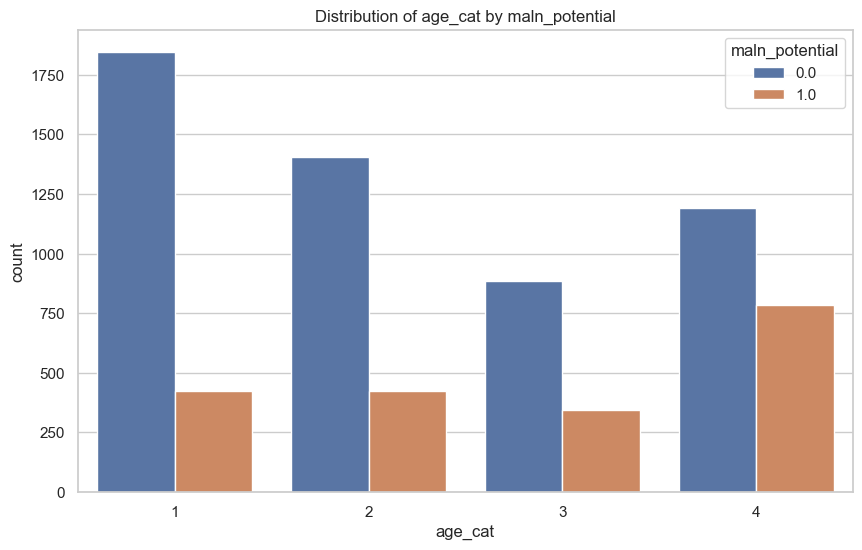

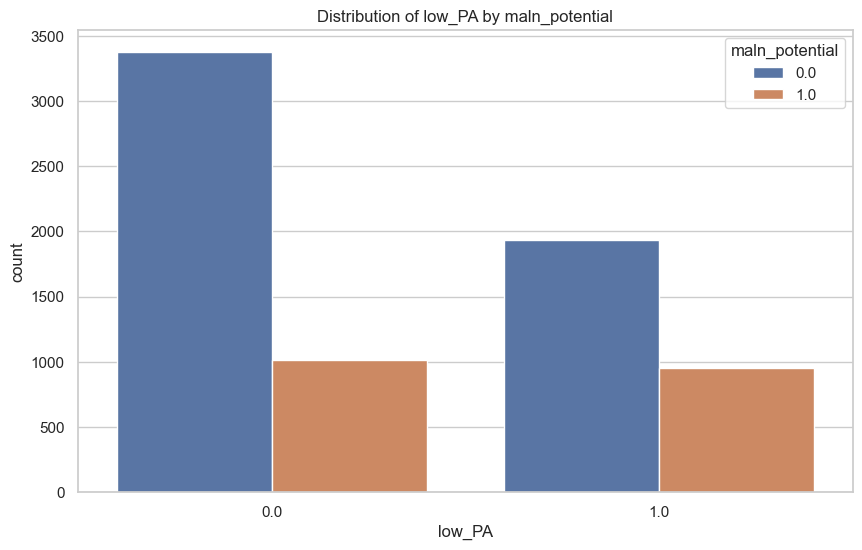

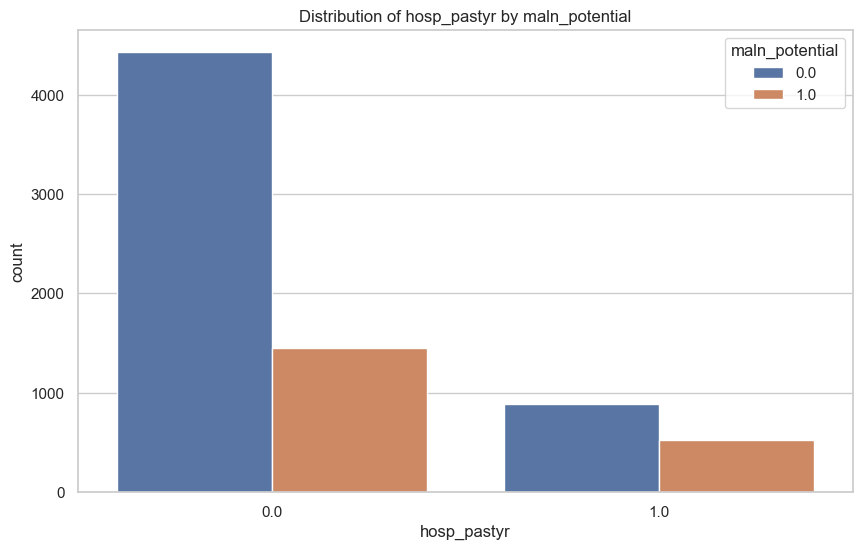

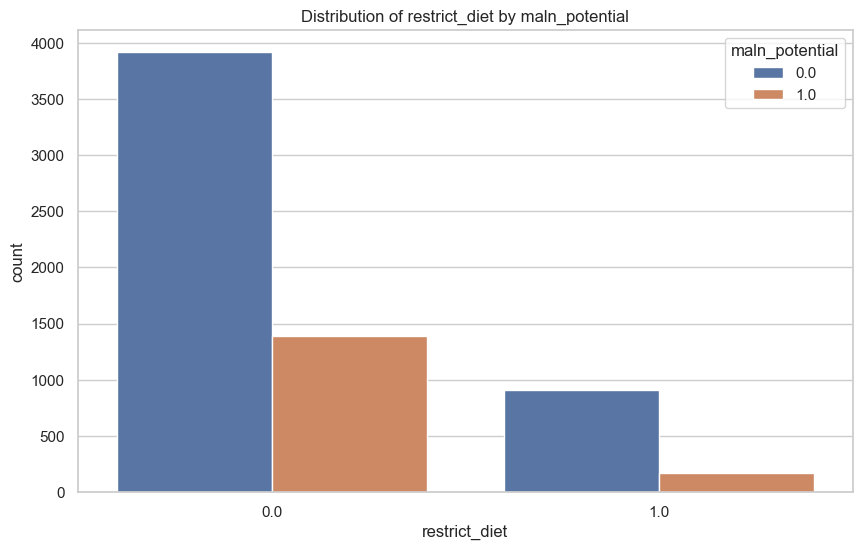

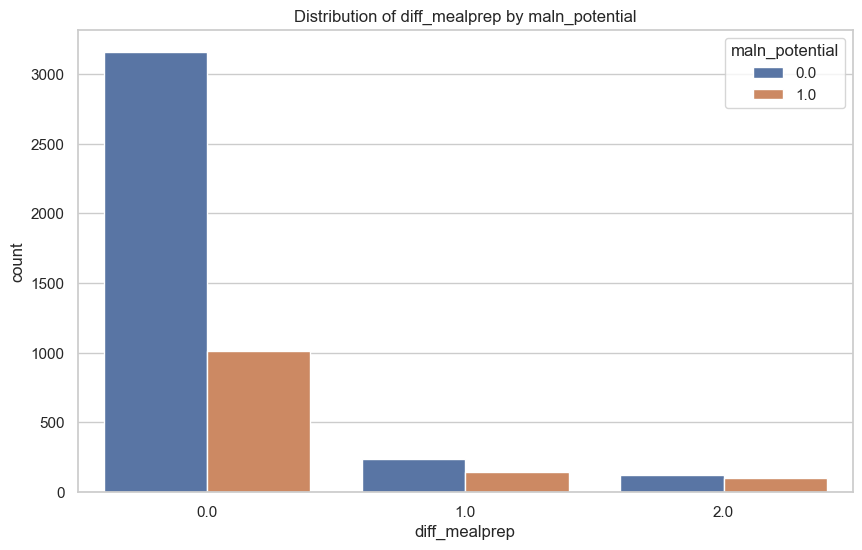

In [55]:
top_features = p_values_df.head(5).index.tolist()

# Plotting the most significant features
sns.set(style="whitegrid")

for feature in top_features:
    plt.figure(figsize=(10, 6))
    if feature in binary_vars+cat_vars:
        sns.countplot(data=df, x=feature, hue='maln_potential')
    else:
        sns.boxplot(data=df, x='maln_potential', y=feature)
    plt.title(f'Distribution of {feature} by maln_potential')
    plt.show()

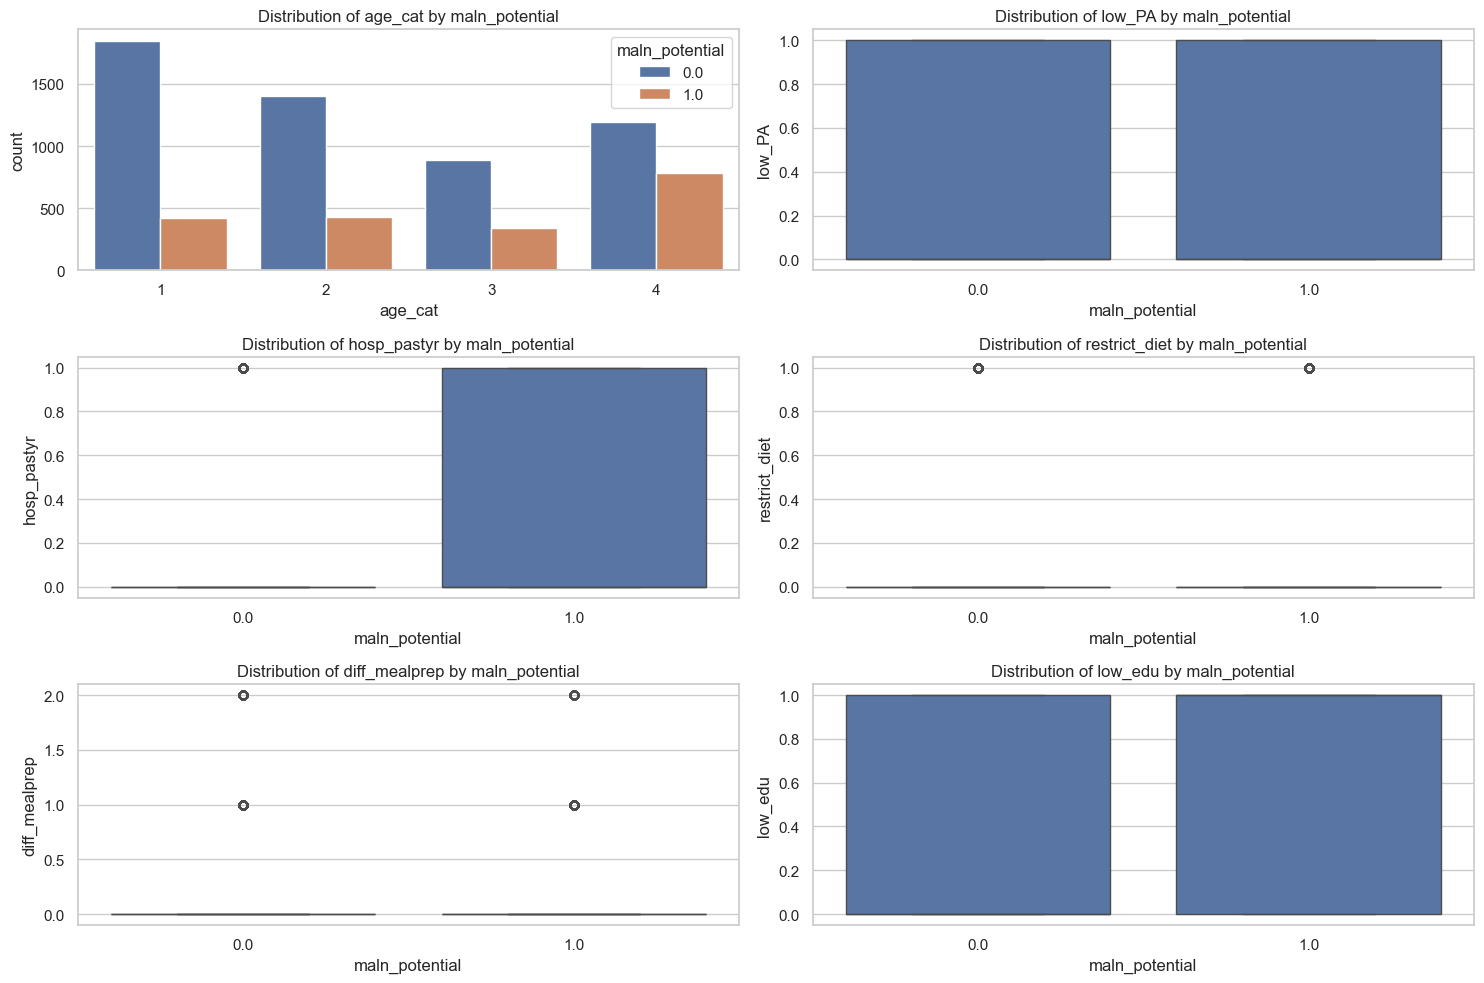

In [59]:
top_features = p_values_df.head(6).index.tolist()

# Plotting the most significant features in a 3x2 grid
sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(top_features):
    ax = axes[i]
    if feature in X.select_dtypes(include=['int64', 'object']).columns:
        sns.countplot(data=df, x=feature, hue='maln_potential', ax=ax)
    else:
        sns.boxplot(data=df, x='maln_potential', y=feature, ax=ax)
    ax.set_title(f'Distribution of {feature} by maln_potential')

plt.tight_layout()
plt.show()